In [1]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
import pmdarima as pm
import pandas as pd
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt

from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

from pmdarima.arima import auto_arima
from pmdarima import arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf

import math
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=20,6

### Funções

In [2]:
def apl_sarima(df_st, m, seasonal ):
    
    df_train = df_st.iloc[:int(len(df_st) * 0.7)]
    df_test = df_st.iloc[int(len(df_st) * 0.7):]

    stepwise= pm.auto_arima(df_train,
                            max_p=22, max_q=18, max_d=2,
                            max_P=22, max_D=2, max_Q=18, max_order=5,
                            m = m,
                            seasonal= seasonal,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True )

    stepwise.summary()
    stepwise.plot_diagnostics();
   
    #MÉTRICAS DO TREINO
    print('Model Train Results')
    print('r2' ,r2_score(stepwise.predict_in_sample(),df_train))
    print('mse' ,mean_squared_error(stepwise.predict_in_sample(), df_train))
    print('RMSE', math.sqrt(mean_squared_error(stepwise.predict_in_sample(), df_train)))
    print('mae', mean_absolute_error(stepwise.predict_in_sample(), df_train))
    print('MAPE', mean_absolute_percentage_error(stepwise.predict_in_sample(), df_train))


    fig, ax = plt.subplots()
    ax.plot(stepwise.predict_in_sample(), label='pred')
    ax.plot(df_train, label='true')
    plt.title('TRAIN MODEL')
    plt.legend()
    plt.show()

    
    stepwise.fit(df_test)

    #PREVENDO O TESTE
    previsao = stepwise.predict_in_sample()
    previsao=pd.DataFrame(previsao)
    previsao['index'] = df_test.index
    previsao = previsao.set_index('index')

    #MÉTRICAS DO TESTE
    
    print('Model Test Results')
    print('R2' ,r2_score(df_test, previsao))
    print('MSE' , mean_squared_error(df_test, previsao))
    print('RMSE', math.sqrt(mean_squared_error(df_test, previsao)))
    print('MAE', mean_absolute_error(df_test, previsao))
    print('MAPE', mean_absolute_percentage_error(df_test, previsao))

    fig, ax = plt.subplots()
    ax.plot(previsao, label='pred')
    ax.plot(df_test, label='true')
    plt.title('SARIMA TEST MODEL')
    plt.legend()
    plt.show()
    
    #GRÁFICO CONCATENADO DO TREINO E DO PREVISTO NO TESTE
    pd.concat([df_st,previsao],
            axis=1).plot(linewidth=2,
                        figsize=(20,7),
                        color=['g','r'])
    plt.legend(['Real','Previsões'], fontsize=15)
    plt.xlabel('Período', size=15)
    plt.title('Previsões X Real',size=15)
    plt.show();
    



### Lendo o Dataset

In [3]:
df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\df_casos_leves')
df_st = df['data_notificacao'].value_counts().rename_axis('Data_notificacao').to_frame('N_casos')
df_st.sort_index(inplace = True)
df_st

C:\Users\gabri\AppData\Local\Temp\ipykernel_7128\3930293311.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\df_casos_leves')


,N_casos
Data_notificacao,
2020-01-12,1
2020-01-20,3
2020-01-22,1
2020-01-24,1
2020-01-25,1
...,...
2022-06-17,1327
2022-06-18,550
2022-06-19,552


### Aplicando o modelo sem sazonalidade

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8625.748, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8956.992, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8955.528, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8851.581, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8954.993, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8731.505, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8699.653, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8544.625, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8687.177, Time=0.51 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8551.500, Time=0.77 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=8550.126, Time=0.90 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=8652.371, Time=0.61 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=8543.053, Time=0.93 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : 

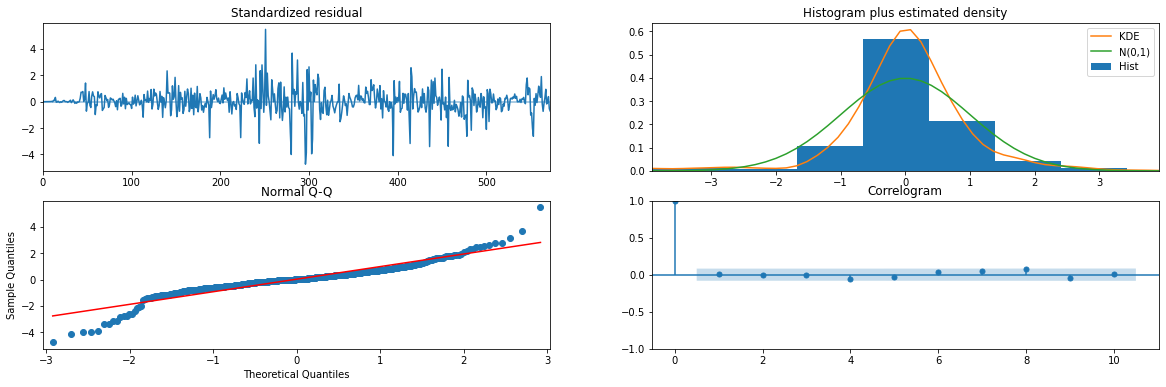

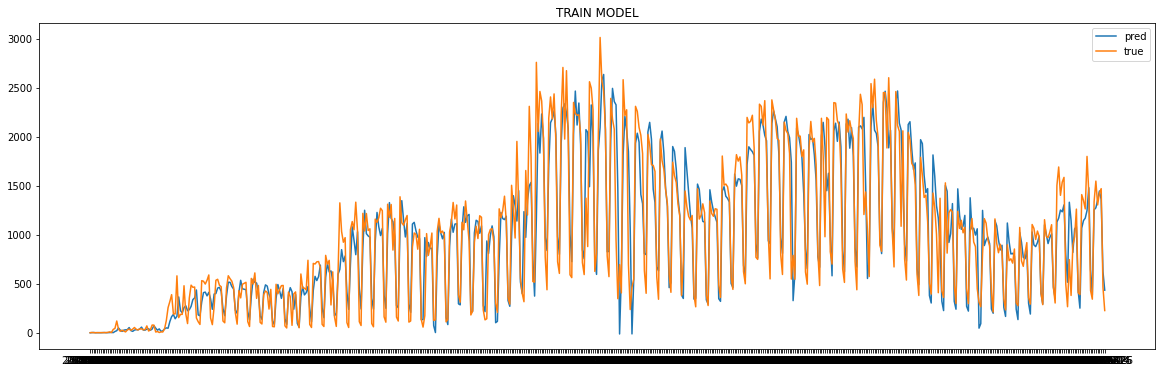

Model Test Results
R2 0.9190636876593371
MSE 211425.0483165668
RMSE 459.8097958031851
MAE 299.9535039490479
MAPE 1.6474785795285145


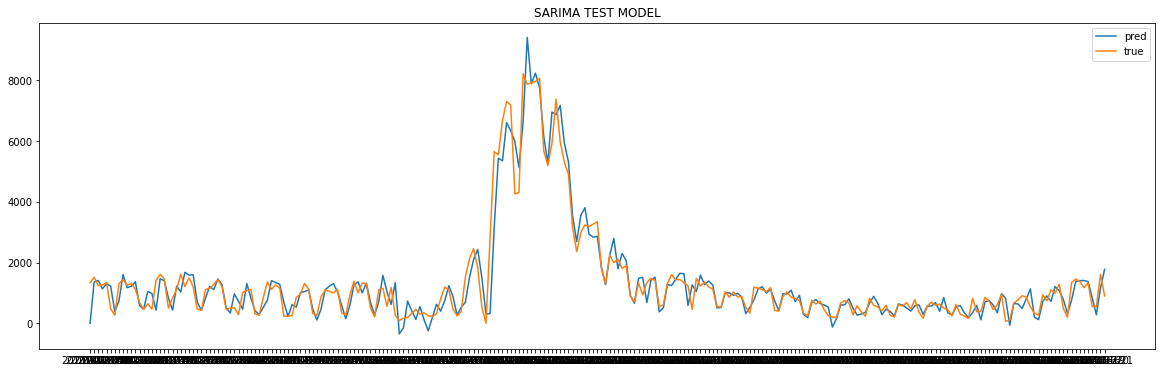

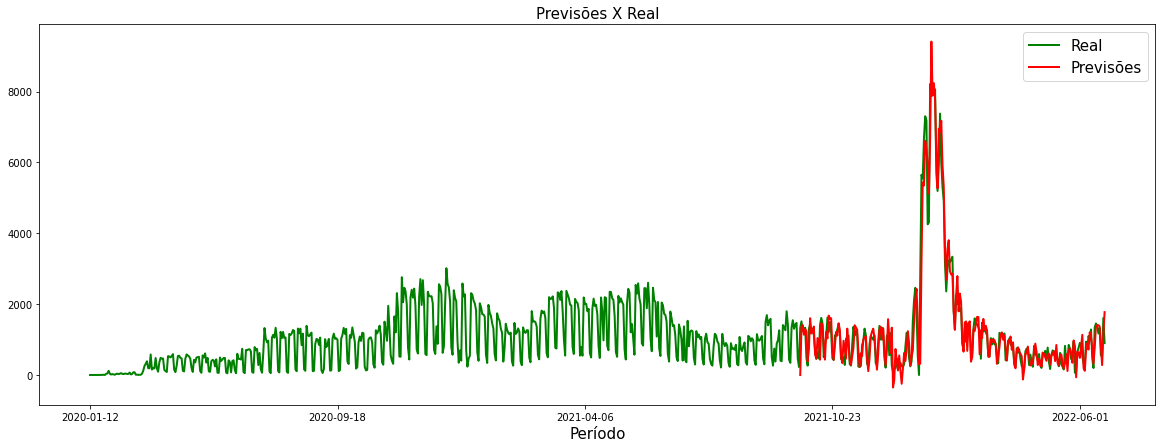

In [4]:
apl_sarima(df_st, 1, False )

### Aplicando para sazonalidade de 7 dias

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=10202.971, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=9594.547, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=9773.654, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=10200.972, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=10201.384, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=9499.772, Time=1.05 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=9409.352, Time=1.58 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=9401.763, Time=1.04 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=9908.977, Time=0.31 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=9406.643, Time=1.94 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=9802.723, Time=0.47 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=948

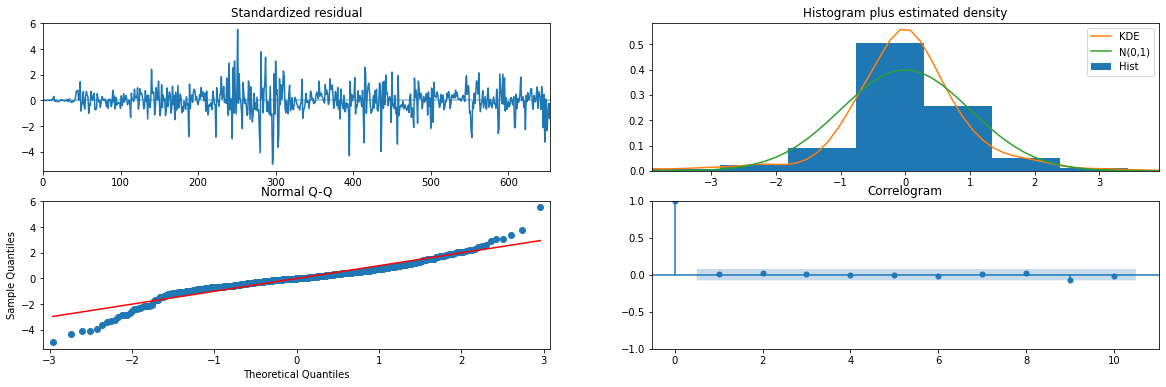

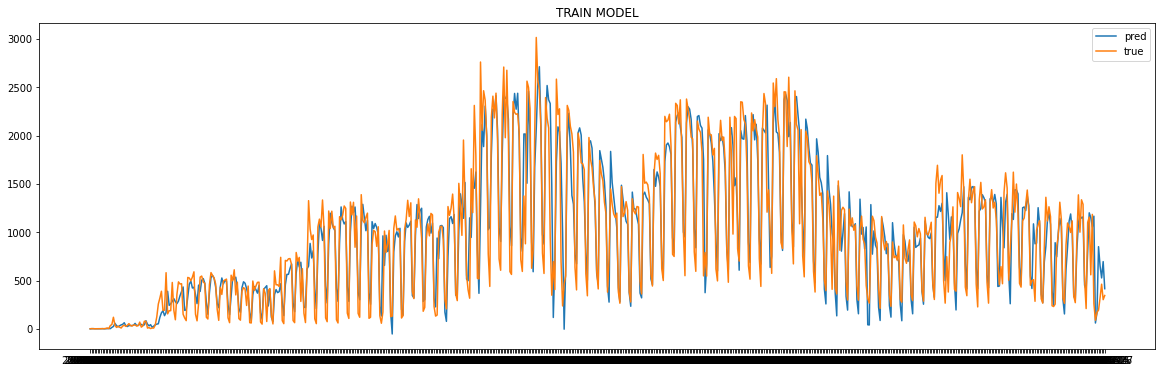

Model Results
R2 0.9213836157000511
MSE 286667.99876112206
RMSE 535.4138574608637
MAE 336.60978829052897
MAPE 2.481018674122714


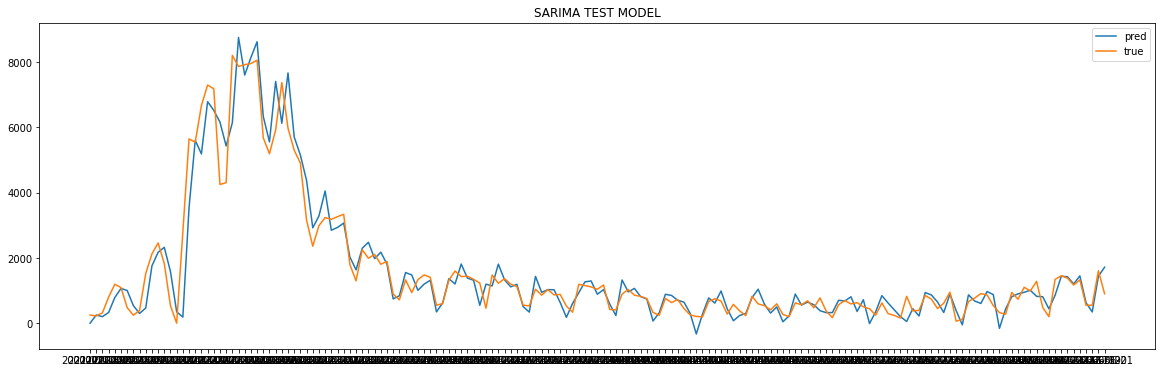

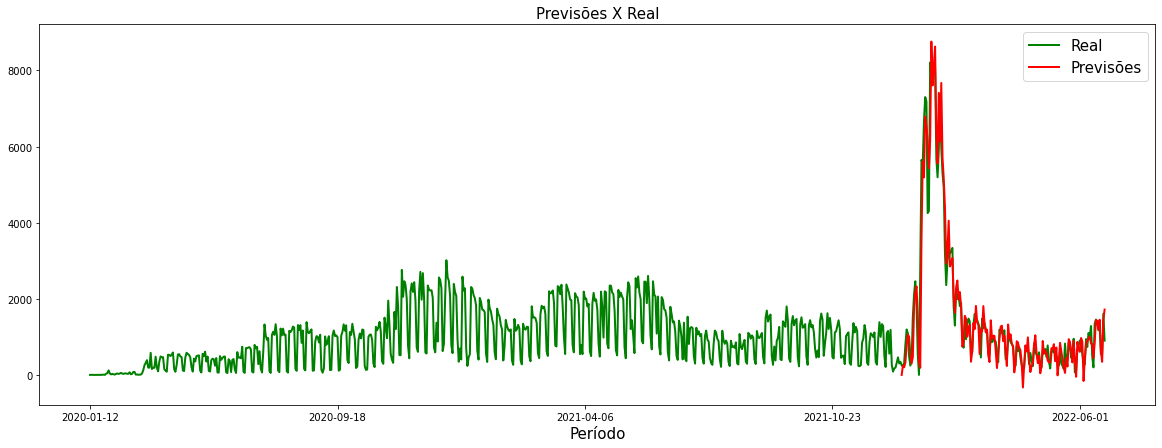

In [25]:
apl_sarima(df_st, 7, True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[15] intercept   : AIC=9795.076, Time=2.27 sec
 ARIMA(0,1,0)(0,0,0)[15] intercept   : AIC=10202.971, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[15] intercept   : AIC=10202.023, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[15] intercept   : AIC=10013.661, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[15]             : AIC=10200.972, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[15] intercept   : AIC=9818.219, Time=2.18 sec
 ARIMA(2,1,2)(1,0,0)[15] intercept   : AIC=9826.664, Time=1.77 sec
 ARIMA(2,1,2)(2,0,1)[15] intercept   : AIC=9763.192, Time=6.88 sec
 ARIMA(2,1,2)(2,0,0)[15] intercept   : AIC=inf, Time=5.21 sec
 ARIMA(2,1,2)(3,0,1)[15] intercept   : AIC=9826.637, Time=12.26 sec
 ARIMA(2,1,2)(2,0,2)[15] intercept   : AIC=inf, Time=7.15 sec
 ARIMA(2,1,2)(1,0,2)[15] intercept   : AIC=9773.080, Time=6.70 sec
 ARIMA(2,1,2)(3,0,0)[15] intercept   : AIC=9762.884, Time=12.02 sec
 ARIMA(2,1,2)(4,0,0)[15] intercept   : AIC=9834.680, Time=23.93 sec
 ARIMA(2,1,2)(4,0,1)[1

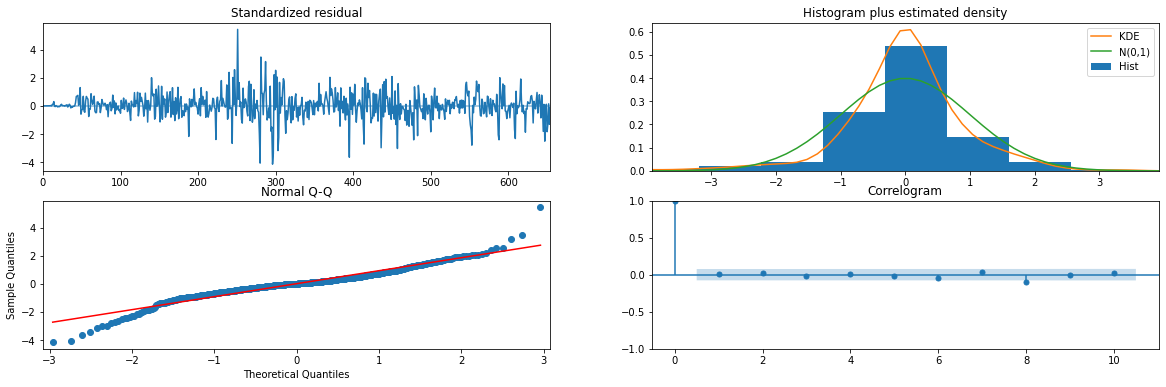

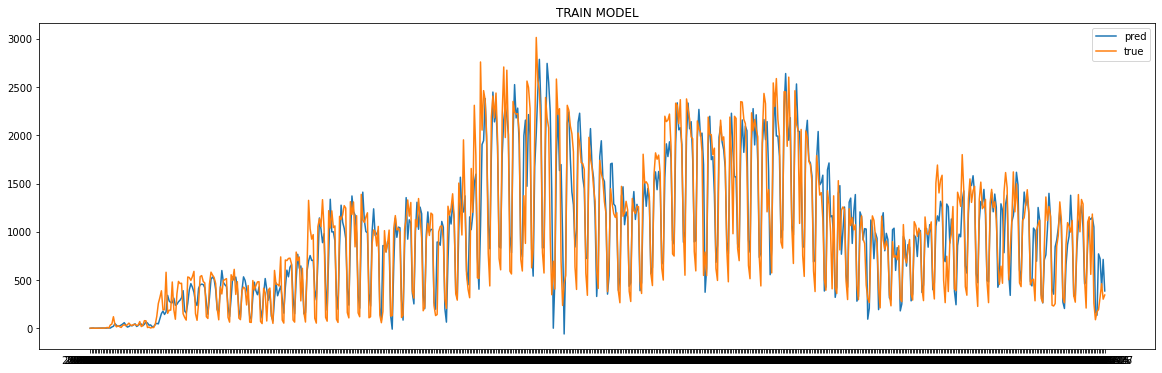

Model Test Results
R2 0.9250389024334817
MSE 273339.3047223233
RMSE 522.8186155085942
MAE 352.14340282742387
MAPE 0.9126446363170369


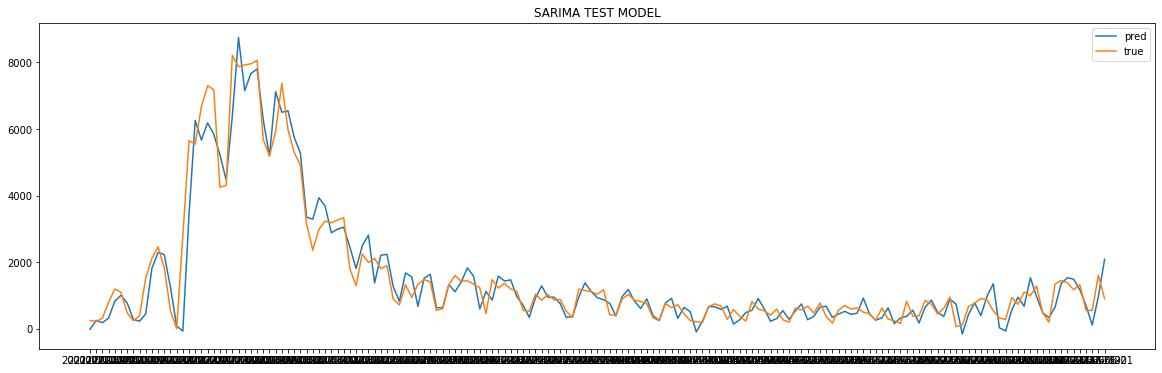

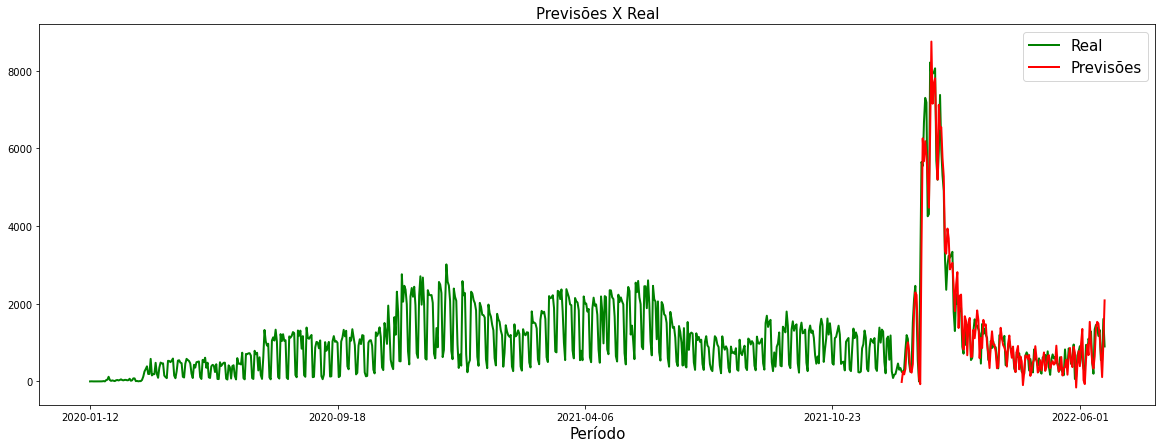

In [28]:
apl_sarima(df_st, 15, True)

### Testando o Modelo Manualmente

In [5]:
df_train = df_st.iloc[:int(len(df_st) * 0.8)]
df_test = df_st.iloc[int(len(df_st) * 0.8):]

In [6]:
stepwise= pm.auto_arima(df_st,
                        max_p=22, max_q=18, max_d=2,
                        max_P=22, max_D=2, max_Q=18,
                        m = 1,
                        seasonal=False,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12556.015, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12848.767, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12849.933, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12848.037, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12846.770, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12692.496, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12677.498, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12497.792, Time=0.81 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12685.843, Time=0.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12718.776, Time=1.07 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=12496.809, Time=1.19 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=12585.399, Time=0.63 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=12520.267, Time=1.22 sec
 ARIMA(2,1,5)(0,0,0)[0] i

In [9]:
stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  821
Model:               SARIMAX(9, 1, 8)   Log Likelihood               -6001.418
Date:                Wed, 16 Nov 2022   AIC                          12038.835
Time:                        11:29:54   BIC                          12123.603
Sample:                             0   HQIC                         12071.361
                                - 821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3323      0.059      5.609      0.000       0.216       0.448
ar.L2         -0.1077      0.054     -2.002      0.045      -0.213      -0.002
ar.L3         -0.1551      0.023     -6.826      0.000      -0.200      -0.111
ar.L4         -0.1676      0.022     -7.551      0.000      -0.211      -0.124
ar.L5         -0.1582      0.023     -6.804      0.000      -0.204      -0.113
ar.L6         -0.1614      0.023     -7.018      0.000      -0.206      -0.116
ar.L7          0.8119      0.024     33.930      0.000       0.765       0.859
ar.L8         -0.4811      0.053     -9.140      0.000      -0.584      -0.378
ar.L9         -0.0668      0.042     -1.578      0.115      -0.150       0.016
ma.L1         -0.5891      0.057    -10.302      0.000      -0.701      -0.477
ma.L2          0.0424      0.046      0.920      0.358      -0.048       0.133
ma.L3          0.0659      0.031      2.115      0.034       0.005       0.127
ma.L4          0.2150      0.032      6.819      0.000       0.153       0.277
ma.L5          0.0388      0.028      1.372      0.170      -0.017       0.094
ma.L6          0.1919      0.030      6.358      0.000       0.133       0.251
ma.L7         -0.6240      0.028    -22.021      0.000      -0.680      -0.568
ma.L8          0.6467      0.033     19.732      0.000       0.582       0.711
sigma2      1.442e+05   3837.906     37.575      0.000    1.37e+05    1.52e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):              3323.30
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                             1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

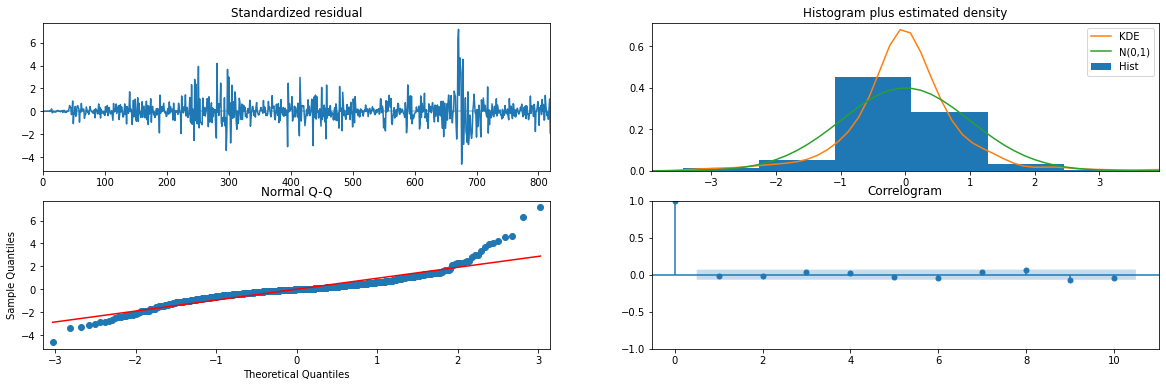

In [10]:
stepwise.plot_diagnostics();

In [11]:
stepwise.fit(df_train)

ARIMA(order=(9, 1, 8), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

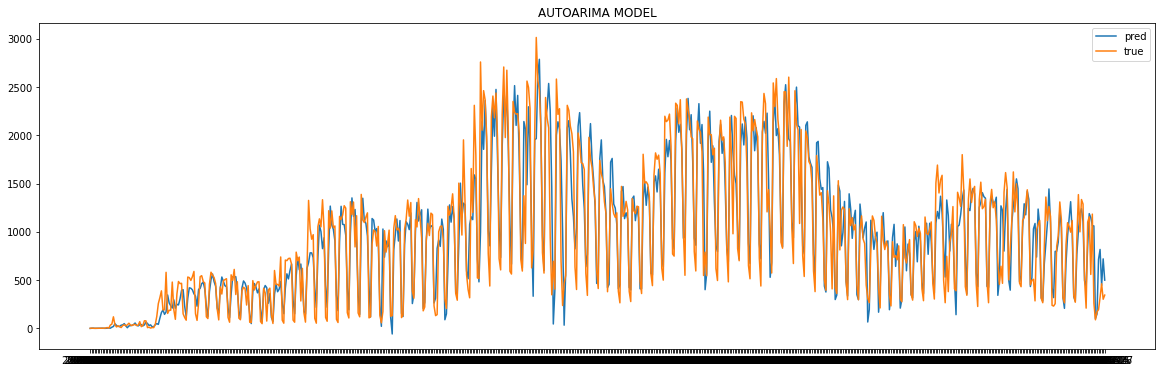

In [12]:
fig, ax = plt.subplots()
ax.plot(stepwise.predict_in_sample(), label='pred')
ax.plot(df_train, label='true')
plt.title('AUTOARIMA MODEL')
plt.legend()
plt.show()

In [13]:
print('SARIMA model Results')
print('r2' ,r2_score(stepwise.predict_in_sample(),df_train))
print('mse' ,mean_squared_error(stepwise.predict_in_sample(), df_train))
print('mae', mean_absolute_error(stepwise.predict_in_sample(), df_train))
print('MAPE', mean_absolute_percentage_error(stepwise.predict_in_sample(), df_train))

SARIMA model Results
r2 0.8155515286155361
mse 79717.10906283358
mae 189.10031273534673
MAPE 6865243334406.616


In [14]:
stepwise.fit(df_test)

ARIMA(order=(9, 1, 8), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [15]:
previsao = stepwise.predict_in_sample()
previsao=pd.DataFrame(previsao)
previsao['index'] = df_test.index
previsao = previsao.set_index('index')

In [19]:
print('Model Results')
print('R2' ,r2_score(df_test, previsao))
print('MSE' , mean_squared_error(df_test, previsao))
print('RMSE', math.sqrt(mean_squared_error(df_test, previsao)))
print('MAE', mean_absolute_error(df_test, previsao))
print('MAPE', mean_absolute_percentage_error(df_test, previsao))

SARIMA model Results
R2 0.9294724090524313
MSE 257172.89766524767
RMSE 507.12217232659793
MAE 324.28438610882193
MAPE 2.570230958475645


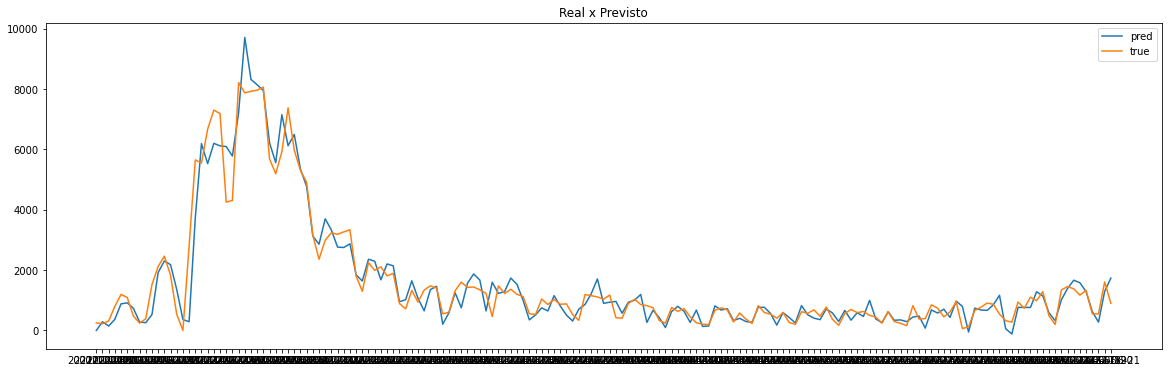

In [20]:
fig, ax = plt.subplots()
ax.plot(previsao, label='pred')
ax.plot(df_test, label='true')
plt.title('Real x Previsto')
plt.legend()
plt.show()

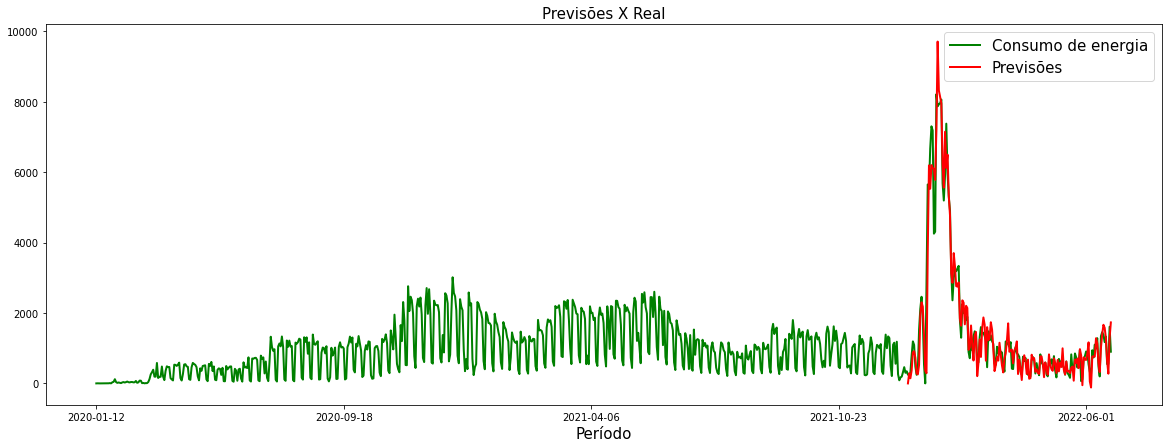

In [18]:
pd.concat([df_st,previsao],
          axis=1).plot(linewidth=2,
                       figsize=(20,7),
                       color=['g','r'])
plt.legend(['Consumo de energia','Previsões'], fontsize=15)
plt.xlabel('Período', size=15)
plt.title('Previsões X Real',size=15)
plt.show();